# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
train_df = pd.read_csv(url, index_col=0)
train_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [2]:
train_df.shape

(6000, 61)

In [3]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [4]:
y.mean()

0.5

In [5]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {'lr': LogisticRegression(),
          'dt': DecisionTreeClassifier()}

for model in models.keys():
    models[model].fit(X_train, y_train)

y_pred = pd.DataFrame(columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
   
    
from sklearn import metrics
print('f1_score')
for model in models.keys():
    print(model,np.sqrt(metrics.f1_score(y_pred[model], y_test)))   
print('Accuracy')

for model in models.keys():
    print(model,np.sqrt(metrics.accuracy_score(y_pred[model], y_test)))   
#dfgdf


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


f1_score
lr 0.7784448422854952
dt 0.7268784181850604
Accuracy
lr 0.7886697661252141
dt 0.7270946751741939


# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [7]:
from sklearn.ensemble import BaggingClassifier

models2 = {'dt': DecisionTreeClassifier(max_depth=None),
          'dtdep2': DecisionTreeClassifier(max_depth=2),
          'lr': LogisticRegression()}

y_pred2 = pd.DataFrame(columns=models2.keys())
for model2 in models2.keys():
    models2[model2] = BaggingClassifier(base_estimator=models2[model2], n_estimators=100, bootstrap=True,
                        random_state=1, n_jobs=-1, oob_score=True).fit(X_train, y_train)   


# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
n_estimators = 100
# set a seed for reproducibility
np.random.seed(123)

n_samples = X_train.shape[0]

# create bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(n_estimators)]

In [10]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(123) 
seeds = np.random.randint(1, 10000, size=n_estimators)

trees = {}
for i in range(n_estimators):
    trees[i] = DecisionTreeClassifier(max_features="sqrt", max_depth=None, random_state=seeds[i])
    trees[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])

In [11]:
y_pred_df = pd.DataFrame(index=X_test.index, columns=list(range(n_estimators)))
for i in range(n_estimators):
    y_pred_df.iloc[:, i] = trees[i].predict(X_test)

y_pred_df.head

<bound method NDFrame.head of       0   1   2   3   4   5   6   7   8   9  ...  90  91  92  93  94  95  96  \
1782   1   1   1   1   0   1   1   1   1   1 ...   1   1   0   1   0   0   0   
3917   0   1   0   0   0   1   1   0   0   1 ...   1   0   1   0   0   1   0   
221    1   1   0   0   1   0   0   1   0   0 ...   0   1   0   0   0   0   1   
2135   0   0   0   0   0   0   1   0   0   1 ...   0   0   1   0   0   1   0   
5224   1   0   1   1   0   0   1   0   1   0 ...   1   0   0   0   1   0   0   
1168   0   0   0   0   1   0   1   0   1   1 ...   1   0   1   0   0   1   0   
879    0   0   1   0   0   0   0   0   0   0 ...   0   0   1   0   0   0   0   
156    0   0   1   0   0   0   0   1   1   1 ...   0   0   0   0   0   1   0   
1657   1   1   0   1   1   1   1   1   1   1 ...   0   0   0   1   1   1   1   
323    0   1   0   1   0   0   0   0   0   0 ...   0   0   0   0   0   0   0   
5302   1   0   1   0   0   0   1   0   1   1 ...   0   0   0   1   0   1   0   
2611   0  

In [12]:
y_pred = (y_pred_df.sum(axis=1) >= (n_estimators / 2)).astype(np.int)

from sklearn import metrics
metrics.f1_score(y_pred, y_test)

0.6459689534301452

In [13]:
metrics.accuracy_score(y_pred, y_test)

0.6429292929292929

In [14]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

In [15]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6318484383000512, 0.6368686868686869)

# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [16]:
y.value_counts().to_frame('count').assign(percentage = lambda x: x/x.sum())
y_pred_df.sum(axis=1)[:10]

1782    62
3917    45
221     44
2135    22
5224    27
1168    40
879     18
156     25
1657    62
323     23
dtype: int64

In [17]:
res=[]
for i in range(y_pred_df.shape[1]):
    print(metrics.accuracy_score(y_pred_df.iloc[:,i], y_test))
    

0.545959595959596
0.5515151515151515
0.5686868686868687
0.5363636363636364
0.5772727272727273
0.5646464646464646
0.5494949494949495
0.5651515151515152
0.5535353535353535
0.555050505050505
0.548989898989899
0.5631313131313131
0.5247474747474747
0.5747474747474748
0.5595959595959596
0.5373737373737374
0.5545454545454546
0.555050505050505
0.5772727272727273
0.5601010101010101
0.5565656565656566
0.5717171717171717
0.5494949494949495
0.543939393939394
0.5737373737373738
0.5606060606060606
0.5636363636363636
0.55
0.5585858585858586
0.5646464646464646
0.5641414141414142
0.556060606060606
0.5590909090909091
0.5580808080808081
0.5555555555555556
0.5782828282828283
0.5858585858585859
0.5404040404040404
0.5585858585858586
0.557070707070707
0.5555555555555556
0.555050505050505
0.5535353535353535
0.5444444444444444
0.557070707070707
0.5656565656565656
0.5434343434343434
0.554040404040404
0.5368686868686868
0.5702020202020202
0.5409090909090909
0.5434343434343434
0.5707070707070707
0.562121212121212

In [18]:
res1=[]
for i in range(y_pred_df.shape[1]):
    print(metrics.f1_score(y_pred_df.iloc[:,i], y_test))

0.5424936386768447
0.5455475946775844
0.5647298674821611
0.5344827586206897
0.5821268097853219
0.563323201621074
0.5508559919436052
0.5649317837291561
0.5508130081300813
0.5479733196511031
0.5413456599897277
0.5566376217324449
0.5292646323161581
0.5734549138804458
0.5683168316831684
0.5429141716566865
0.5545454545454545
0.5451729478575117
0.5804511278195489
0.5620915032679739
0.557013118062563
0.5751503006012024
0.5444330949948928
0.5399898115129904
0.5800995024875623
0.5561224489795918
0.5541795665634676
0.545176110260337
0.5599194360523666
0.5597548518896833
0.5621511922881787
0.5646359583952452
0.5575266092245312
0.5614035087719297
0.5652173913043478
0.5689210118740321
0.5799180327868853
0.5404040404040404
0.5643070787637089
0.5523226135783563
0.5542046605876393
0.5561712846347607
0.5512690355329949
0.5407331975560081
0.5617191404297851
0.553478712357217
0.5354573484069887
0.5460154241645244
0.5356962025316456
0.5712846347607052
0.5326478149100257
0.55203171456888
0.5645491803278689

# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [21]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6318484383000512, 0.6368686868686869)

In [22]:
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

In [23]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6345666497719209, 0.6358585858585859)

# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [24]:
samples_oob = []
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [25]:
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = trees[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5, 1.0, 'OOB error of each tree')

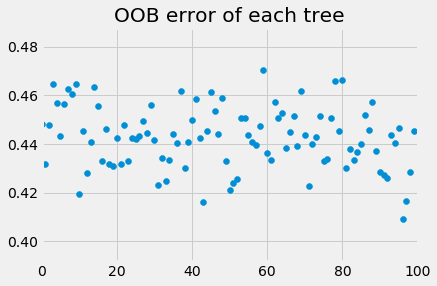

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

In [27]:
alpha = (1 - errors) / (1 - errors).sum()

In [28]:
weighted_sum_1 = ((y_pred_df) * alpha).sum(axis=1)

In [29]:
weighted_sum_1.head(20)

1782    0.619934
3917    0.451088
221     0.440955
2135    0.218923
5224    0.269455
1168    0.399922
879     0.180798
156     0.249498
1657    0.618445
323     0.230200
5302    0.549160
2611    0.257783
811     0.391105
393     0.661003
3593    0.440661
2638    0.529319
2187    0.610617
5351    0.451057
319     0.110776
167     0.769944
dtype: float64

In [30]:
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)

metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6378872524123921, 0.6398989898989899)

# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [31]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators))) #cada modelo hace overfitin

for i in range(n_estimators):
    X_train_2[i] = trees[i].predict(X_train)

In [32]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [33]:
y_pred = lr.predict(y_pred_df)

In [34]:
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6372498717290918, 0.6429292929292929)

In [35]:
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))
X_train_3 = np.zeros((X_train.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):

    X_train_3[:, i] = clf.estimators_[i].predict(X_train)
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
lr = LogisticRegressionCV(cv=5)
lr.fit(X_train_3, y_train)

y_pred = lr.predict(y_pred_all_)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6325486182190379, 0.6373737373737374)

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.5777554101660795, 0.5762626262626263)